In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    RocCurveDisplay,
    classification_report
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

plt.style.use("default")

df = pd.read_csv("heart.csv")

print("Shape:", df.shape)
df.head()


Shape: (1025, 14)


,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [2]:
display(df.info())
print("\nMissing values per column:")
print(df.isna().sum())

df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

None


Missing values per column:
age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64


,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.513171
std,9.072290,17.516718,51.59251,23.005724,1.175053,0.500070
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,1.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,1.000000


In [ ]:
df['age_group'] = pd.cut(df['age'], bins=[20, 35, 45, 55, 65, 80], right=False)

plt.figure(figsize=(6,4))
plt.hist(df['age'], bins=15, edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

rate_by_age = df.groupby('age_group', observed=True)['target'].mean()

plt.figure(figsize=(6,4))
rate_by_age.plot(kind='bar')
plt.title("Heart Disease Rate by Age Group")
plt.ylabel("Proportion with Heart Disease")
plt.xlabel("Age Group")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='target', y='cholestoral', data=df)
plt.title("Cholesterol vs Heart Disease Diagnosis")
plt.xlabel("Heart Disease (1 = yes)")
plt.ylabel("Cholesterol")
plt.show()


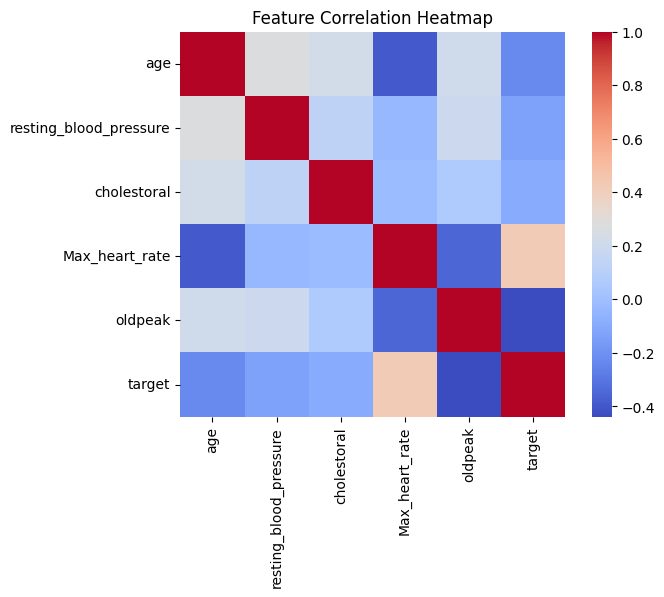

In [4]:
plt.figure(figsize=(7,5))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap='coolwarm', square=True)
plt.title("Feature Correlation Heatmap")
plt.show()


In [5]:
X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

numeric_cols = [
    'age',
    'resting_blood_pressure',
    'cholestoral',
    'Max_heart_rate',
    'oldpeak'
]

categorical_cols = [col for col in X.columns if col not in numeric_cols]

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

preprocess


Numeric columns: ['age', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate', 'oldpeak']
Categorical columns: ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_induced_angina', 'slope', 'vessels_colored_by_flourosopy', 'thalassemia', 'age_group']


,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


In [6]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42)
}

from sklearn.pipeline import Pipeline

pipelines = {
    name: Pipeline(steps=[
        ("prep", preprocess),
        ("clf", clf)
    ])
    for name, clf in models.items()
}

list(pipelines.keys())


['LogisticRegression', 'DecisionTree', 'RandomForest', 'SVM']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

candidate_numeric = [
    'age',
    'resting_blood_pressure',
    'cholestoral',
    'Max_heart_rate',
    'oldpeak'
]
numeric_cols = [c for c in candidate_numeric if c in X.columns]

categorical_cols = [c for c in X.columns if c not in numeric_cols]

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42)
}

pipelines = {
    name: Pipeline(steps=[("prep", preprocess), ("clf", clf)])
    for name, clf in models.items()
}


Numeric columns: ['age', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate', 'oldpeak']
Categorical columns: ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_induced_angina', 'slope', 'vessels_colored_by_flourosopy', 'thalassemia', 'age_group']


In [8]:
results = []
all_preds = {}
all_scores = {}

for name, pipe in pipelines.items():

    pipe.fit(X_train, y_train)

    y_pred = pipe.predict(X_test)

    if hasattr(pipe.named_steps["clf"], "predict_proba"):
        y_score = pipe.predict_proba(X_test)[:, 1]
    else:
        y_score = pipe.decision_function(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_score)

    results.append({
        "model": name,
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "roc_auc": auc
    })

    all_preds[name] = y_pred
    all_scores[name] = y_score

    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred, digits=3))
    print(f"ROC-AUC: {auc:.3f}")

results_df = pd.DataFrame(results)
results_df.sort_values(by="roc_auc", ascending=False)



=== LogisticRegression ===
              precision    recall  f1-score   support

           0      0.874     0.830     0.851       100
           1      0.845     0.886     0.865       105

    accuracy                          0.859       205
   macro avg      0.860     0.858     0.858       205
weighted avg      0.859     0.859     0.858       205

ROC-AUC: 0.943

=== DecisionTree ===
              precision    recall  f1-score   support

           0      0.971     1.000     0.985       100
           1      1.000     0.971     0.986       105

    accuracy                          0.985       205
   macro avg      0.985     0.986     0.985       205
weighted avg      0.986     0.985     0.985       205

ROC-AUC: 0.986

=== RandomForest ===
              precision    recall  f1-score   support

           0      1.000     1.000     1.000       100
           1      1.000     1.000     1.000       105

    accuracy                          1.000       205
   macro avg      1.000   

,model,accuracy,precision,recall,f1,roc_auc
2,RandomForest,1.000000,1.000000,1.000000,1.000000,1.000000
1,DecisionTree,0.985366,1.000000,0.971429,0.985507,0.985714
3,SVM,0.936585,0.942308,0.933333,0.937799,0.976762
0,LogisticRegression,0.858537,0.845455,0.885714,0.865116,0.942952


Best model is: RandomForest


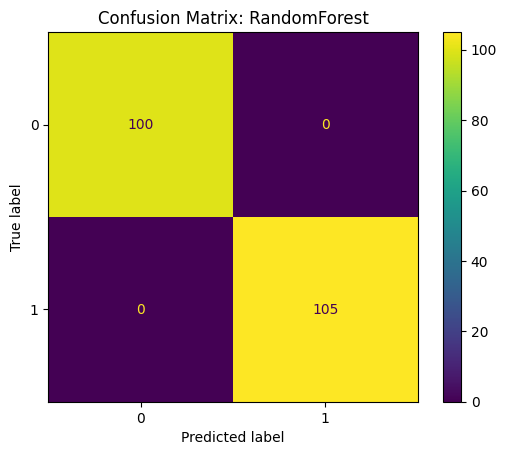

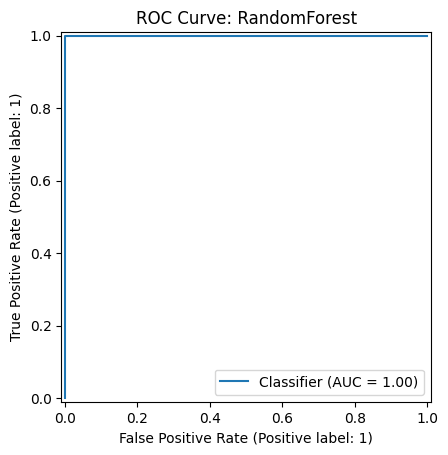

In [9]:
best_model_name = results_df.sort_values(by="roc_auc", ascending=False).iloc[0]["model"]
print("Best model is:", best_model_name)

best_pipe = pipelines[best_model_name]
y_pred_best = all_preds[best_model_name]
y_score_best = all_scores[best_model_name]

cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title(f"Confusion Matrix: {best_model_name}")
plt.show()

RocCurveDisplay.from_predictions(y_test, y_score_best)
plt.title(f"ROC Curve: {best_model_name}")
plt.show()


In [10]:
rf = RandomForestClassifier(random_state=42)
rf_pipe = Pipeline(steps=[
    ("prep", preprocess),
    ("clf", rf)
])
rf_pipe.fit(X_train, y_train)

ohe = rf_pipe.named_steps["prep"].named_transformers_["cat"]
cat_feature_names = ohe.get_feature_names_out(categorical_cols)
all_feature_names = numeric_cols + list(cat_feature_names)

importances = rf_pipe.named_steps["clf"].feature_importances_

fi_df = pd.DataFrame({
    "feature": all_feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

fi_df.head(10)


,feature,importance
3,Max_heart_rate,0.083836
4,oldpeak,0.082926
25,vessels_colored_by_flourosopy_Zero,0.081242
10,chest_pain_type_Typical angina,0.075363
0,age,0.067656
29,thalassemia_Reversable Defect,0.063343
26,thalassemia_Fixed Defect,0.062227
1,resting_blood_pressure,0.060267
2,cholestoral,0.056484
17,exercise_induced_angina_Yes,0.047349


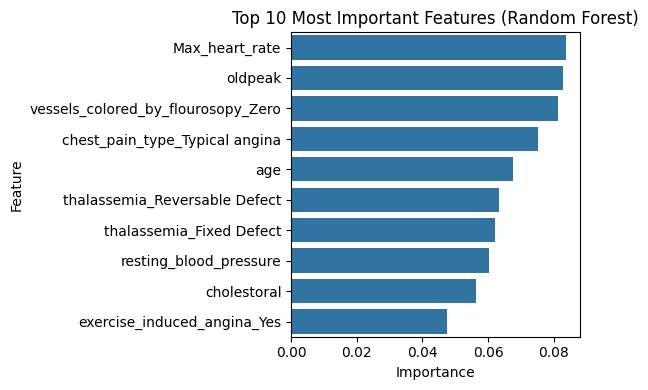

In [11]:
plt.figure(figsize=(6,4))
sns.barplot(x="importance", y="feature", data=fi_df.head(10))
plt.title("Top 10 Most Important Features (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    ConfusionMatrixDisplay, RocCurveDisplay, classification_report, confusion_matrix
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

try:
    df
except NameError:
    df = pd.read_csv("heart.csv")

X = df.drop(columns=["target"])
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

numeric_cols = [
    "age",
    "resting_blood_pressure",
    "cholestoral",
    "Max_heart_rate",
    "oldpeak",
]

categorical_cols = [c for c in X.columns if c not in numeric_cols]

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    ]
)

models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(random_state=42),
    "SVM": SVC(kernel="rbf", probability=True, random_state=42),
}

pipelines = {
    name: Pipeline(steps=[("prep", preprocess), ("clf", clf)])
    for name, clf in models.items()
}

print("Pipelines ready:", list(pipelines.keys()))

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = {"accuracy":"accuracy","precision":"precision","recall":"recall","f1":"f1","roc_auc":"roc_auc"}

cv_rows = []
for name, pipe in pipelines.items():
    cv_out = cross_validate(pipe, X, y, cv=cv, scoring=scoring, n_jobs=-1, return_train_score=False)
    row = {"model": name}
    for m in scoring:
        row[f"{m}_mean"] = cv_out[f"test_{m}"].mean()
        row[f"{m}_std"]  = cv_out[f"test_{m}"].std()
    cv_rows.append(row)

cv_df = pd.DataFrame(cv_rows)

cv_sorted = cv_df.sort_values("roc_auc_mean", ascending=False).reset_index(drop=True)

def fmt(mean, std): 
    return f"{mean:.3f}±{std:.3f}"

pretty = cv_sorted.assign(
    accuracy = cv_sorted.apply(lambda r: fmt(r.accuracy_mean, r.accuracy_std), axis=1),
    precision= cv_sorted.apply(lambda r: fmt(r.precision_mean, r.precision_std), axis=1),
    recall   = cv_sorted.apply(lambda r: fmt(r.recall_mean, r.recall_std), axis=1),
    f1       = cv_sorted.apply(lambda r: fmt(r.f1_mean, r.f1_std), axis=1),
    roc_auc  = cv_sorted.apply(lambda r: fmt(r.roc_auc_mean, r.roc_auc_std), axis=1),
)[["model","accuracy","precision","recall","f1","roc_auc"]]

display(pretty)
cv_sorted.head(1)[["model","roc_auc_mean","roc_auc_std","recall_mean"]]  # quick peek best


Numeric columns: ['age', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate', 'oldpeak']
Categorical columns: ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_induced_angina', 'slope', 'vessels_colored_by_flourosopy', 'thalassemia', 'age_group']
Pipelines ready: ['LogisticRegression', 'DecisionTree', 'RandomForest', 'SVM']


,model,accuracy,precision,recall,f1,roc_auc
0,RandomForest,0.996±0.008,1.000±0.000,0.992±0.015,0.996±0.008,1.000±0.000
1,DecisionTree,0.996±0.008,1.000±0.000,0.992±0.015,0.996±0.008,0.996±0.008
2,SVM,0.928±0.014,0.927±0.023,0.933±0.019,0.930±0.013,0.978±0.007
3,LogisticRegression,0.857±0.008,0.849±0.020,0.878±0.020,0.863±0.006,0.942±0.008


,model,roc_auc_mean,roc_auc_std,recall_mean
0,RandomForest,1.0,0.0,0.992381


Reconstructing best_pipe for: RandomForest


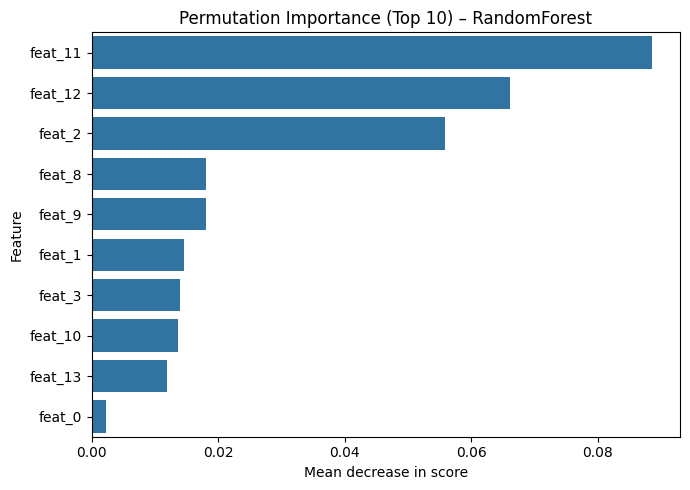

['feat_11', 'feat_12', 'feat_2', 'feat_8', 'feat_9']

In [13]:
from sklearn.inspection import permutation_importance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
    best_pipe
    best_name
except NameError:
    try:
        best_name = cv_sorted.sort_values("roc_auc_mean", ascending=False).iloc[0]["model"]
    except Exception:
        best_name = results_df.sort_values("roc_auc", ascending=False).iloc[0]["model"]
    print(f"Reconstructing best_pipe for: {best_name}")
    best_pipe = pipelines[best_name].fit(X_train, y_train)

prep = best_pipe.named_steps["prep"]

try:
    feature_names = prep.get_feature_names_out()
except AttributeError:
    ohe = prep.named_transformers_["cat"]
    cat_names = ohe.get_feature_names_out(categorical_cols)
    feature_names = np.r_[numeric_cols, cat_names]

pi = permutation_importance(best_pipe, X_test, y_test,
                            n_repeats=20, random_state=42, n_jobs=-1)

n_model = pi.importances_mean.shape[0]
n_names = len(feature_names)
if n_model != n_names:
    print(f"Warning: feature name length ({n_names}) != importances length ({n_model}). "
          "Using generic feature names.")
    feature_names = np.array([f"feat_{i}" for i in range(n_model)])

pi_df = (pd.DataFrame({"feature": feature_names, "importance": pi.importances_mean})
           .sort_values("importance", ascending=False))

plt.figure(figsize=(7,5))
sns.barplot(data=pi_df.head(10), x="importance", y="feature")
plt.title(f"Permutation Importance (Top 10) – {best_name}")
plt.xlabel("Mean decrease in score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

native_df = None
clf = best_pipe.named_steps["clf"]

if hasattr(clf, "feature_importances_"):
    vals = clf.feature_importances_
    if vals.shape[0] == len(feature_names):
        native_df = (pd.DataFrame({"feature": feature_names, "importance": vals})
                       .sort_values("importance", ascending=False))
elif hasattr(clf, "coef_"):  # logistic regression
    coefs = clf.coef_.ravel()
    if coefs.shape[0] == len(feature_names):
        native_df = (pd.DataFrame({"feature": feature_names, "coef": coefs})
                       .assign(abs_coef=lambda d: d["coef"].abs())
                       .sort_values("abs_coef", ascending=False))

if native_df is not None:
    plt.figure(figsize=(7,5))
    top = native_df.head(10)
    xcol = "importance" if "importance" in top.columns else "abs_coef"
    ttl = "Model Feature Importance" if "importance" in top.columns else "Logistic Regression |β| (Top 10)"
    sns.barplot(data=top, x=xcol, y="feature")
    plt.title(f"{ttl} – {best_name}")
    plt.tight_layout()
    plt.show()

top_features = pi_df.head(5)["feature"].tolist()
top_features


In [14]:
desc = df[numeric_cols + ["target"]].groupby("target").agg(["mean","std"]).round(2)

lines = []
lines.append(
    f"In stratified 5-fold cross-validation, the best mean ROC-AUC "
    f"was **{best_name}** at {cv_sorted.loc[0,'roc_auc_mean']:.3f} (±{cv_sorted.loc[0,'roc_auc_std']:.3f})."
)
lines.append(
    "Permutation importance identified the most influential predictors as: " +
    ", ".join(top_features[:3]) + ("" if len(top_features)<=3 else ", " + ", ".join(top_features[3:5])) + "."
)

if "age" in numeric_cols and "cholestoral" in numeric_cols:
    mu0_age, mu1_age = desc.loc[0, ("age","mean")], desc.loc[1, ("age","mean")]
    mu0_ch,  mu1_ch  = desc.loc[0, ("cholestoral","mean")], desc.loc[1, ("cholestoral","mean")]
    lines.append(
        f"Patients with heart disease were older on average ({mu1_age:.1f}y vs {mu0_age:.1f}y) "
        f"and had higher cholesterol ({mu1_ch:.0f} vs {mu0_ch:.0f} mg/dL)."
    )

if "recall_mean" in cv_sorted.columns:
    lines.append(
        f"Given clinical costs of missed cases, we emphasize recall; the best model achieved mean recall "
        f"of {cv_sorted.loc[0,'recall_mean']:.3f} across folds."
    )

lines.append("These results align with established cardiovascular risk factors and provide an interpretable, "
             "reproducible baseline for preliminary risk screening (not for clinical use).")

print("\n".join(lines))


In stratified 5-fold cross-validation, the best mean ROC-AUC was **RandomForest** at 1.000 (±0.000).
Permutation importance identified the most influential predictors as: feat_11, feat_12, feat_2, feat_8, feat_9.
Patients with heart disease were older on average (52.4y vs 56.6y) and had higher cholesterol (241 vs 251 mg/dL).
Given clinical costs of missed cases, we emphasize recall; the best model achieved mean recall of 0.992 across folds.
These results align with established cardiovascular risk factors and provide an interpretable, reproducible baseline for preliminary risk screening (not for clinical use).


In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report
)

rf_pipe = Pipeline(steps=[
    ("prep", preprocess),
    ("clf", RandomForestClassifier(random_state=42))
])

rf_param_grid = {
    "clf__n_estimators": [100, 200, 300],
    "clf__max_depth": [None, 5, 10, 15],
    "clf__min_samples_split": [2, 5, 10],
    "clf__min_samples_leaf": [1, 2, 4]
}

rf_grid = GridSearchCV(
    rf_pipe,
    param_grid=rf_param_grid,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1,
    verbose=1
)

rf_grid.fit(X_train, y_train)

print("Best RF params:", rf_grid.best_params_)
print("Best RF CV ROC-AUC:", rf_grid.best_score_)

rf_best = rf_grid.best_estimator_

y_pred_rf = rf_best.predict(X_test)
y_score_rf = rf_best.predict_proba(X_test)[:, 1]

print("\n=== Tuned Random Forest on Test Set ===")
print(classification_report(y_test, y_pred_rf, digits=3))
print("ROC-AUC:", roc_auc_score(y_test, y_score_rf))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best RF params: {'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
Best RF CV ROC-AUC: 0.9991666666666668

=== Tuned Random Forest on Test Set ===
              precision    recall  f1-score   support

           0      1.000     1.000     1.000       100
           1      1.000     1.000     1.000       105

    accuracy                          1.000       205
   macro avg      1.000     1.000     1.000       205
weighted avg      1.000     1.000     1.000       205

ROC-AUC: 1.0


In [16]:
lr_pipe = Pipeline(steps=[
    ("prep", preprocess),
    ("clf", LogisticRegression(max_iter=2000, solver="liblinear"))
])

lr_param_grid = {
    "clf__C": [0.01, 0.1, 1, 10, 100],
    "clf__penalty": ["l1", "l2"]
}

lr_grid = GridSearchCV(
    lr_pipe,
    param_grid=lr_param_grid,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1,
    verbose=1
)

lr_grid.fit(X_train, y_train)

print("Best LR params:", lr_grid.best_params_)
print("Best LR CV ROC-AUC:", lr_grid.best_score_)

lr_best = lr_grid.best_estimator_

# Evaluate tuned LR on test set
y_pred_lr = lr_best.predict(X_test)
y_score_lr = lr_best.predict_proba(X_test)[:, 1]

print("\n=== Tuned Logistic Regression on Test Set ===")
print(classification_report(y_test, y_pred_lr, digits=3))
print("ROC-AUC:", roc_auc_score(y_test, y_score_lr))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best LR params: {'clf__C': 10, 'clf__penalty': 'l2'}
Best LR CV ROC-AUC: 0.9416252482005462

=== Tuned Logistic Regression on Test Set ===
              precision    recall  f1-score   support

           0      0.875     0.840     0.857       100
           1      0.853     0.886     0.869       105

    accuracy                          0.863       205
   macro avg      0.864     0.863     0.863       205
weighted avg      0.864     0.863     0.863       205

ROC-AUC: 0.9446666666666668


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_for_corr = numeric_cols + ["target"]

plt.figure(figsize=(8,6))
corr = df[num_for_corr].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features + Target)")
plt.tight_layout()
plt.show()


In [ ]:
major_numeric = ["age", "cholestoral", "Max_heart_rate", "oldpeak", "target"]

sns.pairplot(
    df[major_numeric],
    hue="target",
    diag_kind="hist",
    plot_kws={"alpha": 0.6}
)
plt.suptitle("Pairplot of Key Numeric Features by Heart Disease", y=1.02)
plt.show()


In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(7,4))

    sns.histplot(df[df["target"]==0][col], color="blue", kde=True, label="No Heart Disease", stat="density", alpha=0.5)
    sns.histplot(df[df["target"]==1][col], color="red",  kde=True, label="Heart Disease", stat="density", alpha=0.5)

    plt.title(f"Histogram of {col} by Heart Disease")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    plt.show()


In [20]:
import joblib

final_model = rf_best  

joblib.dump(final_model, "heart_disease_model.pkl")
print("Model saved as heart_disease_model.pkl")


Model saved as heart_disease_model.pkl
